In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('review_dataset_v2.csv')

## Column Types

* Numerical - review , rating, date, sentiment score, sentiment magnitude, confident
* Categorical - company , country, review class, deletected lang, category
* Mixed - name , topic, content, positive class, negative class

## Univariate Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1456 non-null   object 
 1   review               1456 non-null   float64
 2   rating               1456 non-null   int64  
 3   company              1456 non-null   object 
 4   country              1456 non-null   object 
 5   date                 1456 non-null   object 
 6   topic                1456 non-null   object 
 7   content              1456 non-null   object 
 8   sentiment_score      1456 non-null   float64
 9   sentiment_magnitude  1456 non-null   float64
 10  entities             1456 non-null   object 
 11  review_class         1456 non-null   object 
 12  positive_reasons     1456 non-null   object 
 13  negative_reasons     1456 non-null   object 
 14  detected_language    1456 non-null   object 
 15  category             700 non-null    o

In [4]:
df.describe()

,review,rating,sentiment_score,sentiment_magnitude,confidence
count,1456.000000,1456.000000,1456.000000,1456.000000,681.000000
mean,5.976648,1.940247,-0.392514,0.780769,0.692291
std,13.457001,1.597636,0.620247,0.280502,0.142589
min,1.000000,1.000000,-0.900000,0.000000,0.500000
25%,1.000000,1.000000,-0.800000,0.700000,0.560000
50%,2.000000,1.000000,-0.700000,0.700000,0.670000
75%,5.000000,2.000000,-0.500000,0.800000,0.810000
max,172.000000,5.000000,0.900000,4.000000,0.990000


#### Review

* Conclusion
    1. 

In [5]:
df['review'].describe()

count    1456.000000
mean        5.976648
std        13.457001
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       172.000000
Name: review, dtype: float64

In [6]:
df[df.duplicated()]

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence


In [10]:
df[df['review'] > 50]

,name,review,rating,company,country,date,topic,content,sentiment_score,sentiment_magnitude,entities,review_class,positive_reasons,negative_reasons,detected_language,category,confidence
26,p fisher,93.0,1,amazon,united kingdom,2024-10-01 18:51:01,criminal behaviour,i told amazon to cancel an order the driver st...,-0.7,0.7,"neighbours, driver, amazon, order, money, refu...",negative,no_positive,i told amazon to cancel an order the driver st...,en,NaN,NaN
81,stephen n.,59.0,1,amazon,united kingdom,2024-10-01 10:32:11,80 minutes wasted on their customer services,i had an offer as a loyal customer to get grea...,-0.7,0.7,"benefits, customer, barclaycard, offer, one, q...",negative,no_positive,i had an offer as a loyal customer to get grea...,en,finance,0.67
83,joanne collins,54.0,1,amazon,united kingdom,2024-10-01 07:38:38,still no account,well i left it for a week hoping my amazon acc...,-0.8,0.8,"account, amazon, telephone number, telephone n...",negative,no_positive,well i left it for a week hoping my amazon acc...,en,NaN,NaN
123,dmac,77.0,1,amazon,united kingdom,2024-10-01 03:50:34,prime big deal what do you take me for,come on amazon treat me seriously a ceiling s...,0.2,0.2,"deal, amazon, ceiling spotlight, sale, bargain...",positive,come on amazon treat me seriously a ceiling s...,no_negative,en,home & garden',0.76
130,ian wooller,122.0,1,amazon,united kingdom,2024-10-01 09:18:33,cancelled order,they cancelled an order that was going to be d...,-0.8,0.8,"order, customer, anything, reason",negative,no_positive,they cancelled an order that was going to be d...,en,arts & entertainment',0.55
195,willy villa-shonner,63.0,1,amazon,united kingdom,2024-10-01 06:45:03,the courier left the packages unattended in an...,lazy courier,-0.8,0.8,courier,negative,no_positive,lazy courier,en,NaN,NaN
202,raymond van spall,172.0,1,amazon,united kingdom,2024-09-01 15:14:05,amazon ring device,this door device not worked now years pay fee ...,-0.8,0.8,"door device, fee, idea",negative,no_positive,this door device not worked now years pay fee ...,en,NaN,NaN
221,james procter,52.0,1,amazon,united kingdom,2024-09-01 10:55:44,parcels always just dumped without any notific...,deliveries just dumped in reception or warehou...,-0.7,0.7,"deliveries, reception, notification, warehouse...",negative,no_positive,deliveries just dumped in reception or warehou...,en,NaN,NaN
319,darren howard,150.0,1,ebay,united kingdom,2024-10-01 14:22:48,allows counterfeit items all over the,allows counterfeit items all over the site you...,-0.8,0.8,"site, counterfeit items, nothing, item, someth...",negative,no_positive,allows counterfeit items all over the site you...,en,shopping',0.62
330,freedom spirit,133.0,1,ebay,united kingdom,2024-09-01 15:22:32,ebay help seller to scam me,i bought a new item though ebay but i never re...,-0.8,0.8,"item, courier, picture, letterbox, ccj, courie...",negative,no_positive,i bought a new item though ebay but i never re...,en,shopping',0.68


<Axes: ylabel='Frequency'>

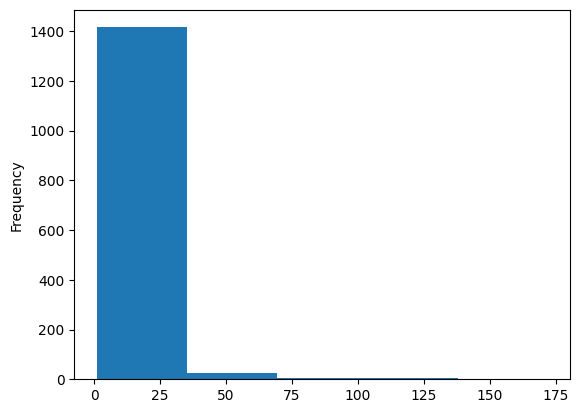

In [15]:
df['review'].plot(kind='hist', bins = 5)

<Axes: ylabel='Frequency'>

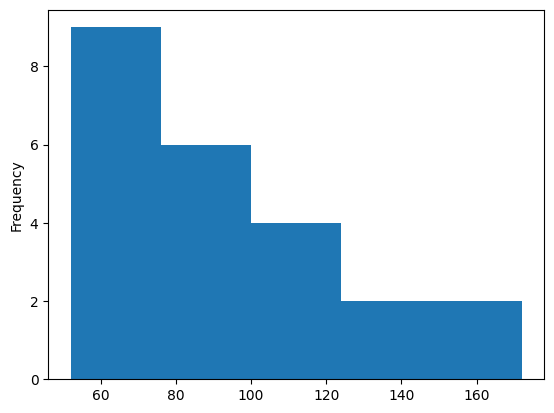

In [17]:
df[df['review'] > 50]['review'].plot(kind='hist', bins=5)

<Axes: ylabel='Density'>

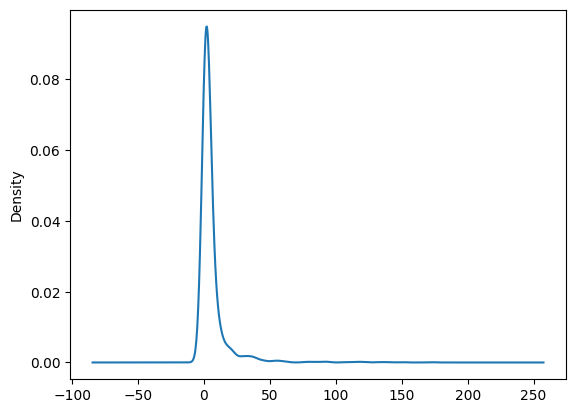

In [18]:
df['review'].plot(kind='kde')

In [19]:
df['review'].skew()

np.float64(6.449684920728695)

<Axes: >

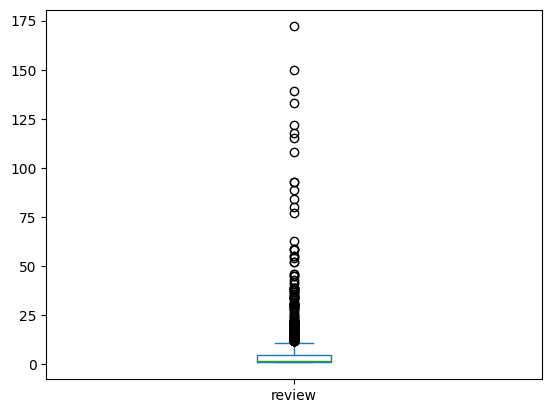

In [20]:
df['review'].plot(kind='box')